# Bag-of-words

In [1]:
import numpy as np
import pandas as pd
import re
import string
import unidecode #pip install unidecode
%matplotlib inline
import matplotlib.pyplot as plt

# Read original csv file
df0 = pd.read_csv('tweets_public3.csv', encoding='utf-16', index_col='tweet_id', sep=',')
# Keep relevant columns only
df = df0.drop(['retweet_count','is_reply','reply_count','tweet_coord','tweet_location','user_timezone'], axis=1)
#df.head()

### First Step Data cleaning:
- Convert all tweets to lowercase
- Delete URLs, additional white spaces, twitter vocabulary (RT, via, by), numbers, single characters (e.g. q instead of que) and accents.

In [2]:
def basicCleaning(tweet):
    #Convert to lower case
    tweet = tweet.lower()
    #Delete URLs www.* or https?://*
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    #Remove additional white spaces
    tweet = re.sub('\s+', ' ', tweet)
    #Delete via, rt and by
    #Delete via, rt and by
    tweet = re.sub(r'\b(rt|via|by)\b','',tweet)
    # Remove numbers
    tweet = re.sub(r'\b\d+\b','',tweet)
    # Remove single characters
    tweet = re.sub(r'\b\w\b','',tweet)
    # Remove accents
    tweet = unidecode.unidecode(tweet)
    return tweet

df['text'] = df['text'].apply(basicCleaning)
df.head()

,tweet_created,airline_sentiment,text,newairline_sentiment
tweet_id,,,,
942743012337123328,Mon Dec 18 13:07:04 +0000 2017,positive,"""los pilotos de ryanair desconvocan la huelga ...",positive
926857871916183553,Sat Nov 04 17:05:11 +0000 2017,positive,"@iberia @lavecinarubia si ,por favor las decla...",positive
936979305720090626,Sat Dec 02 15:24:09 +0000 2017,neutral,@iberia me dirias por favor que costo tiene?,neutral
943983853802328064,Thu Dec 21 23:17:43 +0000 2017,negative,"@supermanlopezn @iberia @giroditalia champion,...",negative
938207464457211904,Wed Dec 06 00:44:25 +0000 2017,negative,@srtafarrelldm @klm @iberia eso de avianca es ...,negative


### Second Step Data cleaning
- Remove all users (relevant airline information is already in the dataFrame) and punctuation

In [3]:
def moreCleaning(tweet):
    #Delete @usernames
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove punctuation (includes @, \ and #)
    regex = re.compile('[%s]' % re.escape(string.punctuation+u"¡"+u"¿"+u"€"))
    tweet = re.sub(regex,'',tweet)
    return tweet

df['text'] = df['text'].apply(moreCleaning)
df.head()

,tweet_created,airline_sentiment,text,newairline_sentiment
tweet_id,,,,
942743012337123328,Mon Dec 18 13:07:04 +0000 2017,positive,los pilotos de ryanair desconvocan la huelga t...,positive
926857871916183553,Sat Nov 04 17:05:11 +0000 2017,positive,si por favor las declaraciones de amor entre...,positive
936979305720090626,Sat Dec 02 15:24:09 +0000 2017,neutral,me dirias por favor que costo tiene,neutral
943983853802328064,Thu Dec 21 23:17:43 +0000 2017,negative,champion no vuele mas con esos descarados,negative
938207464457211904,Wed Dec 06 00:44:25 +0000 2017,negative,eso de avianca es verdad mi mama le paso d...,negative


### Tokenizing
Define a list with all word-vectors in the text and remove Spanish stopwords and words such as ['volar','vuelo','vuelos','aerolinea','destino','hacer','si','puede','favor']

In [4]:
from nltk.tokenize import word_tokenize
df['tokens'] = df['text'].apply(word_tokenize)

In [5]:
from nltk.corpus import stopwords

stopWords = set(stopwords.words('spanish'))
# Remove accents
stopWordsNoAccents = [unidecode.unidecode(w) for w in stopWords]

# Add extra airline vocabulary
airlinesList = ['aena','aeromar','aeromexico','aireuropa','airmadrid','airnostrum','americanairlines',
     'avianca','blueair','britishairways','easyjet','emirates','eurowings','flybe','iberia','klm',
     'lufthansa','niki','norwegian','qatar','ryanair','spanair','spiritairlines',
     'tame','vasp','volaris','vueling','westjet','wizzair']
newstopWords = stopWordsNoAccents+airlinesList+['dia','volar','vuelo','vuelos','viaje','viajar','aerolinea',
                                                'destino','destinos','hacer','si','puede','hola','ano',
                                                'favor','click','holaargentina',
                                               'solo']#,'deseadme','suerte','holacolombia','hola','europeos',
                                                #'mejor precio']
def removeStopWords(tweet):
    wordsFiltered = []
    for word in tweet:
        if word not in newstopWords:
            wordsFiltered.append(word.strip())
    return wordsFiltered

df['wordsFiltered'] = df['tokens'].apply(removeStopWords)
df.head()

,tweet_created,airline_sentiment,text,newairline_sentiment,tokens,wordsFiltered
tweet_id,,,,,,
942743012337123328,Mon Dec 18 13:07:04 +0000 2017,positive,los pilotos de ryanair desconvocan la huelga t...,positive,"[los, pilotos, de, ryanair, desconvocan, la, h...","[pilotos, desconvocan, huelga, tras, ver, reco..."
926857871916183553,Sat Nov 04 17:05:11 +0000 2017,positive,si por favor las declaraciones de amor entre...,positive,"[si, por, favor, las, declaraciones, de, amor,...","[declaraciones, amor, rubijarena, pueden, qued..."
936979305720090626,Sat Dec 02 15:24:09 +0000 2017,neutral,me dirias por favor que costo tiene,neutral,"[me, dirias, por, favor, que, costo, tiene]","[dirias, costo]"
943983853802328064,Thu Dec 21 23:17:43 +0000 2017,negative,champion no vuele mas con esos descarados,negative,"[champion, no, vuele, mas, con, esos, descarados]","[champion, vuele, descarados]"
938207464457211904,Wed Dec 06 00:44:25 +0000 2017,negative,eso de avianca es verdad mi mama le paso d...,negative,"[eso, de, avianca, es, verdad, mi, mama, le, p...","[verdad, mama, paso, dos, veces, terrible]"


Transform the lists of filtered words into one single string per airline sentiment to retrieve it to WordCloud

In [6]:
def jointokens(frame):
    tokens_list = frame['wordsFiltered'].tolist()
    sentence = [' '.join(w) for w in tokens_list]
    allsentences = ' '.join(sentence)
    return allsentences

all_text = df.groupby('newairline_sentiment').apply(jointokens)

In [7]:
negatius = word_tokenize(all_text['negative'])
positius = word_tokenize(all_text['positive'])
neutres = word_tokenize(all_text['neutral'])
print(len(positius))

7266


In [8]:
intersection = list(set(positius) & set(negatius))
tmp = [positius.remove(x) for x in intersection]
tmp = [negatius.remove(x) for x in intersection]

for x in intersection:
    if(x in neutres): 
        neutres.remove(x)

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib

def plot_WordCloud(stringplot):
    # STOPWORDS: Nombres aerolíneas y palabras del tema y/o generales nipy_spectral
    ignore = ''
    wc = {'width': 600, 'height': 300, 'random_state': 0}
    fwc = {'background_color':"white",'colormap': matplotlib.cm.nipy_spectral,'stopwords': ignore, **wc}
    wordcloud = WordCloud(**fwc).generate(stringplot)
    plt.imshow(wordcloud)
    plt.axis("off")

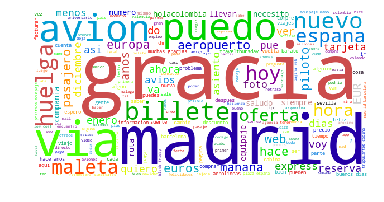

In [10]:
key = 'neutral'
sentence = ' '.join(neutres)
plot_WordCloud(sentence) #all_text[key])
fig = plt.gcf()
fig.set_size_inches(6,8)
fitxer = 'BoW'+'_'+key+'.jpg'
fig.savefig(fitxer, bbox_inches='tight',dpi=200)

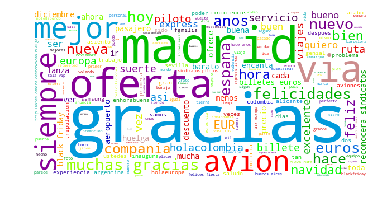

In [11]:
key = 'positive'
sentence = ' '.join(positius)
plot_WordCloud(sentence) #all_text[key])
fig = plt.gcf()
fig.set_size_inches(6,8)
fitxer = 'BoW'+'_'+key+'.jpg'
fig.savefig(fitxer, bbox_inches='tight',dpi=200)

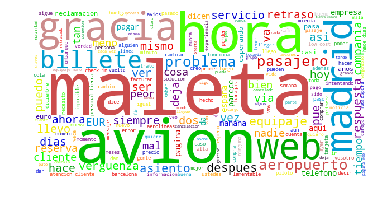

In [12]:
key = 'negative'
sentence = ' '.join(negatius)
plot_WordCloud(sentence) #all_text[key])
fig = plt.gcf()
fig.set_size_inches(6,8)
fitxer = 'BoW'+'_'+key+'.jpg'
fig.savefig(fitxer, bbox_inches='tight',dpi=400)

### BoWs for each day in the sample

In [13]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
df['date']= df['tweet_created'].dt.strftime('%Y-%m-%d')
df.head(3)

,tweet_created,airline_sentiment,text,newairline_sentiment,tokens,wordsFiltered,date
tweet_id,,,,,,,
942743012337123328,2017-12-18 13:07:04,positive,los pilotos de ryanair desconvocan la huelga t...,positive,"[los, pilotos, de, ryanair, desconvocan, la, h...","[pilotos, desconvocan, huelga, tras, ver, reco...",2017-12-18
926857871916183553,2017-11-04 17:05:11,positive,si por favor las declaraciones de amor entre...,positive,"[si, por, favor, las, declaraciones, de, amor,...","[declaraciones, amor, rubijarena, pueden, qued...",2017-11-04
936979305720090626,2017-12-02 15:24:09,neutral,me dirias por favor que costo tiene,neutral,"[me, dirias, por, favor, que, costo, tiene]","[dirias, costo]",2017-12-02


In [14]:
# Identify dates with tweets
unicos = df['date'].value_counts()
dates = unicos.index.tolist() # List of unique dates
print(dates)

['2017-12-14', '2017-12-13', '2017-11-30', '2017-12-15', '2017-12-19', '2018-01-03', '2017-12-18', '2017-12-12', '2017-12-22', '2018-01-04', '2017-11-21', '2017-11-29', '2017-11-22', '2017-11-23', '2017-10-25', '2017-11-28', '2017-11-14', '2017-11-27', '2017-10-30', '2017-11-24', '2017-11-07', '2017-12-26', '2017-10-26', '2017-12-05', '2017-12-27', '2017-11-03', '2017-12-01', '2017-12-29', '2017-11-17', '2018-01-02', '2018-01-08', '2017-12-28', '2017-11-13', '2017-11-15', '2017-11-06', '2017-12-17', '2017-11-25', '2017-12-03', '2017-11-05', '2017-12-02', '2017-11-16', '2017-12-04', '2017-12-23', '2017-12-30', '2017-12-24', '2017-11-20', '2017-11-04', '2017-12-16', '2017-11-26', '2017-10-27', '2017-12-06', '2017-11-02', '2017-12-25', '2018-01-01', '2017-12-21', '2017-10-31', '2017-12-31', '2017-11-09', '2018-01-05', '2017-10-28']


KeyError: 'positive'

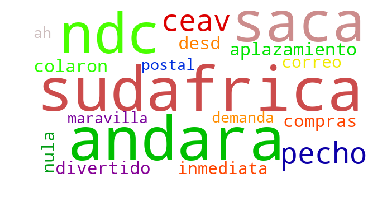

In [16]:
keys = ['positive','negative','neutral']
for dia in dates:
    df_sel = df.loc[df['date'] == dia]
    all_text = df_sel.groupby('newairline_sentiment').apply(jointokens)
    for key in keys:
        tokens = word_tokenize(all_text[key])
        for x in intersection:
            if(x in tokens): 
                tokens.remove(x)
        sentence = ' '.join(tokens)
        plot_WordCloud(sentence)
        fig = plt.gcf()
        fig.set_size_inches(6,8)
        fig.savefig('BoW_'+dia+'_'+key+'.jpg', bbox_inches='tight',dpi=200)